# EE610 Image Processing Assignment 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
#reffered youtube tutorials

**Q1) Read a color image of your own in jpg format, display it, and print its shape. Comment on what the 
dimensions correspond to**

(477, 850, 3)

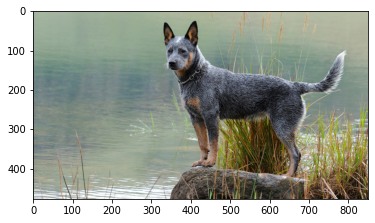

In [2]:
img = cv.imread('dog1.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) #in opencv image array is stored by refault in BGR color space, referred geekesforgeeks to get code to convert it to RGB space
plt.imshow(img)
img.shape

In the image shape 477 and 850 correspond to 477x850 pixels array and 3 corresponds to RGB intensities

**Q2) Print the pixel intensities of a small section of the main image, check how various ranges are addressed, and 
comment on where the origin of the image is**

In [3]:
#The RGB intensities of the first five rows of the first column are
print(img[0:5,0])
print('origin',img[0,0])

[[164 179 160]
 [159 178 158]
 [161 178 160]
 [162 176 161]
 [159 178 159]]
origin [164 179 160]


Origin of the image is in the top left corner as can be seen in the figure in the last answer

**Q3) Overwrite the values in the small window with 255 and display the new image and comment**

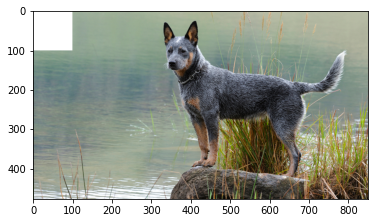

In [4]:
img[0:100,0:100] = [255,255,255]
plt.imshow(img)
#The part of the image that is overwritten by [255,255,255] which is at the left corner is completly white

**Q4) Overwrite the values in the small window with 256 and display the new image and comment**

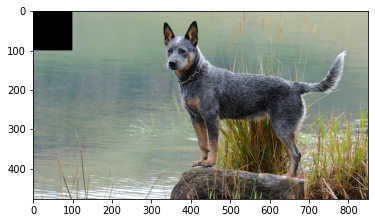

In [5]:
img[0:100,0:100] = [256, 256, 256]
plt.imshow(img)

We can observe the part which is overwritten by [256,256,256] has actually turned black which means that 256 actually corresponds to pixel value of 0

**Q5) Crop a margin of a few pixels from all four sides and store the cropped image in a new image array, and 
display the cropped image**

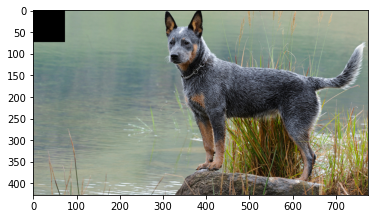

In [6]:
new_img = img[26:453,26:801]
plt.imshow(new_img)

**Q6) Save it as a new image file in png format**

In [7]:
cv.imwrite('new_dog_img.png',new_img)

True

**Q7) Add 50 to all the pixel values of the original image, display the new image and comment on the results**

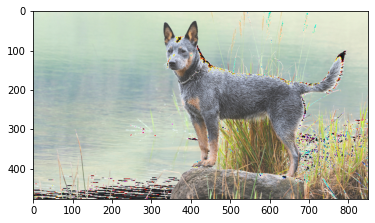

In [8]:
img = cv.imread('dog1.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img += 50
plt.imshow(img) 

We can observe in the output image that regions which were earlier white(i.e pixel value near 255) have actually turned
#dark due to the looping effect of adding 50 to each pixel. Further the pixels which had intensities in midrange have become whiter after adding 50

**Q8) Invert the y-axis to create a mirror image and display it**

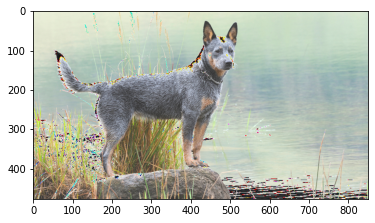

In [9]:
inv_img = cv.flip(img,1)
plt.imshow(inv_img)
#I read about cv.flip() from geeksforgeeks

**Q9) Take a night shot of your own, convert it to greyscale, and display its histogram**

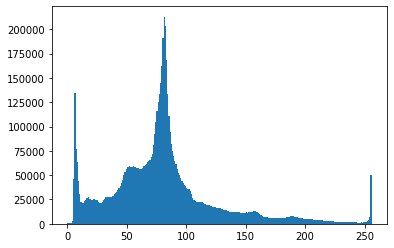

In [10]:
img2 = cv.imread('infinity.jpg',0)
#read from geeksforgeeks that setting flag 0 in cv.imread() converts images into grayscale form
plt.hist(img2.ravel(),256,[0,256])
plt.show()
#img2.ravel() converts 2D array into 1D array

In [11]:
img2

array([[77, 75, 75, ..., 67, 69, 72],
       [76, 76, 75, ..., 69, 69, 70],
       [76, 77, 75, ..., 72, 69, 67],
       ...,
       [45, 46, 46, ..., 54, 49, 48],
       [45, 46, 46, ..., 59, 54, 52],
       [44, 46, 46, ..., 66, 58, 51]], dtype=uint8)

**Q10) Brighten the image by multiplying pixel values with a>1, and find a good value of a**

True

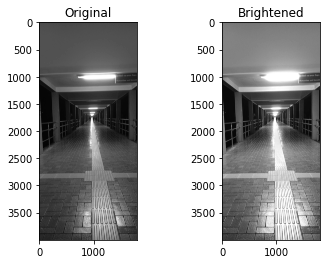

In [12]:
a=1.6
bright_img2 = cv.multiply(img2,a)
#got cv.multiply() from stackoverflow
fig, (imgs1, imgs2) = plt.subplots(1,2)
imgs1.imshow(img2,'gray')
imgs1.set_title('Original')
imgs2.imshow(bright_img2,'gray')
imgs2.set_title('Brightened')
cv.imwrite('a.png',bright_img2)
#the image in the right is brightend image

**Q11) Try to enhance it using power transform, display results for different gammas, and find the best (subjective) 
gamma**

(-0.5, 1799.5, 3999.5, -0.5)

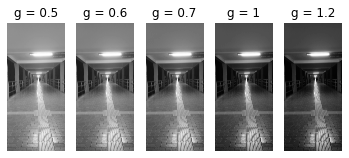

In [13]:
tr_img1 = np.power(img2,0.5)
tr_img2 = np.power(img2,0.6)
tr_img3 = np.power(img2,0.7)
tr_img4 = np.power(img2,1)
tr_img5 = np.power(img2,1.2)

fig, (imgs1, imgs2, imgs3, imgs4, imgs5) = plt.subplots(1,5)
imgs1.imshow(tr_img1,'gray')
imgs1.set_title('g = 0.5')
imgs1.axis('off')

imgs2.imshow(tr_img2,'gray')
imgs2.set_title('g = 0.6')
imgs2.axis('off')

imgs3.imshow(tr_img3,'gray')
imgs3.set_title('g = 0.7')
imgs3.axis('off')

imgs4.imshow(tr_img4,'gray')
imgs4.set_title('g = 1')
imgs4.axis('off')

imgs5.imshow(tr_img5,'gray')
imgs5.set_title('g = 1.2')
imgs5.axis('off')
#g in the image stands for gamma

Gamma = 0.7 appears to be the best value for gamma correction. In that we can still clearly see the pattern on the pavements and also sone pillers which were'nt visible in the original image are visible

**Q12) Perform histogram equalization to enhance it and display the histogram. Comment on why the histogram is 
not flat**

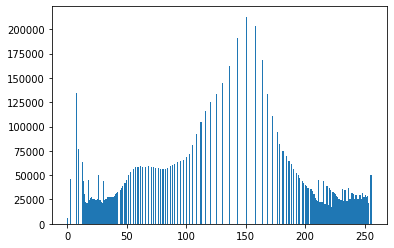

In [14]:
equalize_img = cv.equalizeHist(img2)
plt.hist(equalize_img.ravel(),256,[0,256])
plt.show()
#Got to know the cv.equalizeHist() function from geeksforgeeks

The histogram obtained is not flat because we are dealing with descrete numbers and whenever the final intensity value after histogram equalization is a floating point number it is approximated to its nearest integer. Thus some bins miss out and some other bins have high values in the final histogram

**Q12) Think of a good target histogram and do histogram specification (histogram matching)**

In [15]:
src = cv.imread('blackhole.jpg')
src = cv.cvtColor(src,cv.COLOR_BGR2RGB)
ref = cv.imread('quasar.jpg')
ref = cv.cvtColor(ref,cv.COLOR_BGR2RGB)
#importing new source and reference images

In [16]:
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)
#got this code from pyimagesearch's histogram matching tutorial

Text(0.5, 1.0, 'source image')

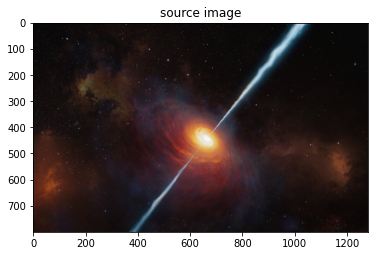

In [17]:
plt.imshow(src)
plt.title('source image')

Text(0.5, 1.0, 'refrence image')

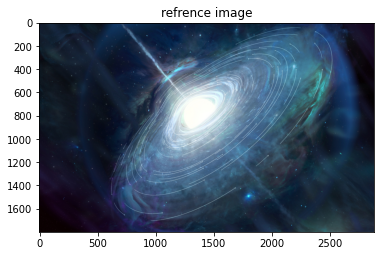

In [18]:
plt.imshow(ref)
plt.title('refrence image')

Text(0.5, 1.0, 'matched image')

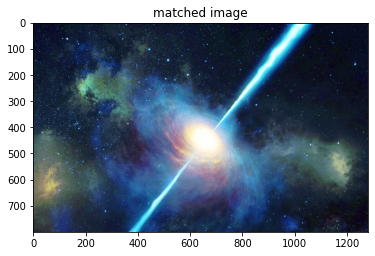

In [19]:
plt.imshow(matched)
plt.title('matched image')

In [20]:
#source of the dog image - 'https://images.ctfassets.net/440y9b545yd9/4LMoGmdS7pew3Re42mtZtf/29b7f2adf591a70f1410e453746e60b4/Australian_cattle850.jpg'
#https://www.geeksforgeeks.org/convert-bgr-and-rgb-with-python-opencv/
#https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/
#https://stackoverflow.com/questions/71204415/opencv-python-fastest-way-to-multiply-pixel-value
#https://www.geeksforgeeks.org/histograms-equalization-opencv/#:~:text=Histogram%20equalization%20is%20a%20method,represented%20by%20close%20contrast%20values.
#sourec of reference image in Q12 - https://www.quantamagazine.org/why-changing-look-quasars-appear-to-vanish-20181121/
#source of source image in Q12 - https://cdn.sci.news/images/enlarge8/image_9427e-Radio-Loud-Quasar.jpg